In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/campuspulse/Dataset.csv


In [61]:
df = pd.read_csv("/kaggle/input/campuspulse/Dataset.csv")
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  internet    649 non-null    o

In [63]:
df.shape

(649, 33)

In [64]:
df.describe()

,Medu,Fedu,traveltime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3
count,649.000000,576.000000,576.000000,649.000000,649.000000,604.000000,649.000000,649.000000,649.000000,580.000000,649.000000,614.000000,649.000000,611.000000,603.000000,610.000000
mean,2.514638,2.303819,1.574653,0.221880,3.930663,3.172185,3.184900,1.502311,3.536210,3.746552,11.399076,11.586319,11.906009,16.747954,1.913765,2.262295
std,1.134552,1.111076,0.744592,0.593235,0.955717,1.044684,1.175766,0.924834,1.446259,4.732890,2.745265,2.927878,3.230656,1.216812,0.830798,1.285279
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,16.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,4.000000,2.000000,11.000000,11.000000,12.000000,17.000000,2.000000,2.000000
75%,4.000000,3.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,5.000000,6.000000,13.000000,13.000000,14.000000,18.000000,2.000000,3.000000
max,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,22.000000,4.000000,5.000000


In [65]:
# number of missing values in each col
df.isnull().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

In [66]:
# we can see G2 has 35 null values so filling mean of other G1 and G3  in it 
# meaning filling the na value with mean of respective G1 G3 values
for i in range(len(df)):
    if pd.isnull(df.loc[i, 'G2']):
        df.loc[i, 'G2'] = (df.loc[i, 'G1'] + df.loc[i, 'G3']) / 2

df.isnull().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2             0
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

In [67]:
#i filled missing freetime and absences values with the mean because it’s a quick way to estimate what a student might answer
freetimemean = df['freetime'].mean()
df['freetime'] = df['freetime'].fillna(freetimemean)

absencesmean = df['absences'].mean()
df['absences'] = df['absences'].fillna(absencesmean)

df.isnull().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime       0
goout          0
Dalc           0
health         0
absences       0
G1             0
G2             0
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

In [68]:
#i used the mode to fill missing values in traveltime, famsize, and fedu because the mode is the most common answer, so it’s a good guess what most students would have answered
mode = df['traveltime'].mode()[0]
df['traveltime'] = df['traveltime'].fillna(mode)

famsizemode = df['famsize'].mode()[0]
df['famsize'] = df['famsize'].fillna(famsizemode)

fedumode = df['Fedu'].mode()[0]
df['Fedu'] = df['Fedu'].fillna(fedumode)
df.isnull().sum()

school         0
sex            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime       0
goout          0
Dalc           0
health         0
absences       0
G1             0
G2             0
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

In [69]:
#if i dont know what a student thinks of higher education then the best thing to do would be to choose randomly whether it would be a yes or no
import random
for i in range(len(df)):
    if pd.isnull(df.loc[i, 'higher']):
        df.loc[i, 'higher'] = random.choice(['yes', 'no'])

df.isnull().sum()

school         0
sex            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
famrel         0
freetime       0
goout          0
Dalc           0
health         0
absences       0
G1             0
G2             0
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

In [70]:
df[['Feature_1', 'Feature_2', 'Feature_3']].head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Feature_1,Feature_2,Feature_3
0,18.0,2.0,1.0
1,17.0,2.0,1.0
2,15.0,NaN,3.0
3,15.0,3.0,1.0
4,16.0,NaN,2.0
5,NaN,2.0,2.0
6,16.0,2.0,1.0
7,17.0,2.0,1.0
8,15.0,2.0,1.0
9,15.0,2.0,1.0


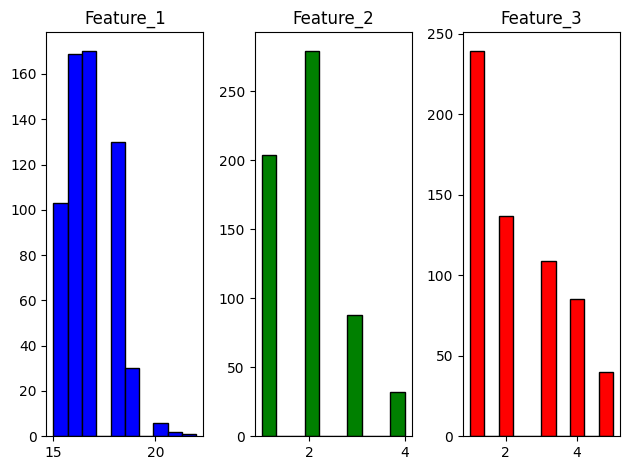

In [71]:
plt.subplot(1, 3, 1)
plt.hist(df['Feature_1'].dropna(), bins=10, color='blue', edgecolor='black')
plt.title('Feature_1')

plt.subplot(1, 3, 2)
plt.hist(df['Feature_2'].dropna(), bins=10, color='green', edgecolor='black')
plt.title('Feature_2')

plt.subplot(1, 3, 3)
plt.hist(df['Feature_3'].dropna(), bins=10, color='red', edgecolor='black')
plt.title('Feature_3')

plt.tight_layout()
plt.show()

Since feature 1 has values between 15-20 i think it might be something close to score or grades
in feature 2 values are between 1 to 4 and in feature 3 values are between 1 to 5 so checking the corr of these features with other cols with similar range of values

In [72]:
corr = df[['Feature_1', 'Feature_2', 'Feature_3', 'G1', 'G2', 'G3', 'failures','freetime','absences','health','famrel','goout','Dalc']].corr()
print(corr)

           Feature_1  Feature_2  Feature_3        G1        G2        G3  \
Feature_1   1.000000   0.014528   0.097160 -0.181571 -0.109626 -0.105610   
Feature_2   0.014528   1.000000  -0.199162  0.261477  0.243334  0.249884   
Feature_3   0.097160  -0.199162   1.000000 -0.152487 -0.162721 -0.175726   
G1         -0.181571   0.261477  -0.152487  1.000000  0.867858  0.826387   
G2         -0.109626   0.243334  -0.162721  0.867858  1.000000  0.923620   
G3         -0.105610   0.249884  -0.175726  0.826387  0.923620  1.000000   
failures    0.312151  -0.144468   0.063646 -0.384210 -0.380911 -0.393316   
freetime   -0.025311  -0.043952   0.144892 -0.078928 -0.102893 -0.107196   
absences    0.111031  -0.127182   0.129780 -0.151292 -0.130980 -0.098308   
health     -0.007759  -0.062246   0.110179 -0.051647 -0.084241 -0.098851   
famrel     -0.040149  -0.018598  -0.082948  0.048795  0.090103  0.063361   
goout       0.089430  -0.068552   0.397811 -0.074053 -0.081484 -0.087641   
Dalc        

From this corr we can see highest corr between feature_3 and Dalc
So I feel that Feature_3 likely represents alcohol consumption on weekends.

feature_3 = wendalc


From the values of feature_1 i feel like it is representing the grades at the end of the year that student was expecting ( i felt that becuase if i were to fill this form then i would also choose a number like 17-18/20 like most have done ;)

feature_1 = expG3

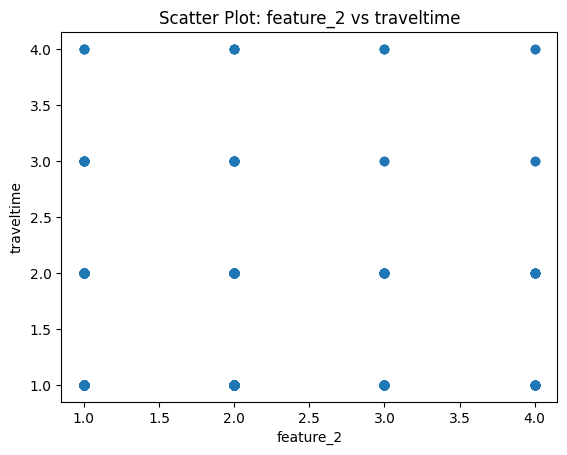

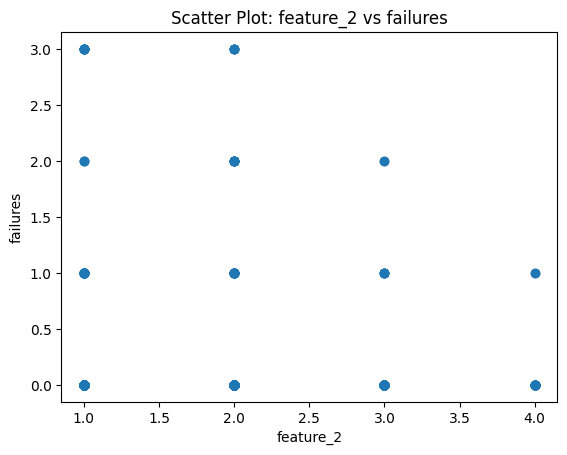

In [73]:
plt.scatter(df['Feature_2'], df['traveltime'])
plt.xlabel('feature_2')
plt.ylabel('traveltime')
plt.title('Scatter Plot: feature_2 vs traveltime')
plt.show()

plt.scatter(df['Feature_2'], df['failures'])
plt.xlabel('feature_2')
plt.ylabel('failures')
plt.title('Scatter Plot: feature_2 vs failures')
plt.show()

Exploratory Insight Report      

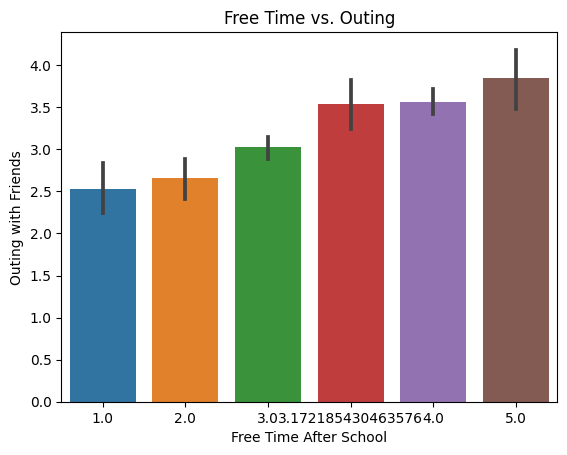

In [74]:
#1. Do students with more free time after school go out more with friends?
sns.barplot(x=df['freetime'], y=df['goout'])
plt.xlabel('Free Time After School')
plt.ylabel('Outing with Friends')
plt.title('Free Time vs. Outing')
plt.show()

students with more free time after school tend to got out with friends showing good friendships 

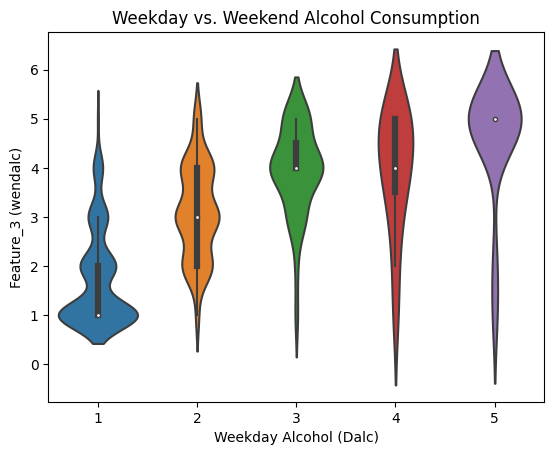

In [75]:
#2. How does weekday alcohol consumption relate to weekend alcohol consumption?
sns.violinplot(x=df['Dalc'], y=df['Feature_3'])
plt.xlabel('Weekday Alcohol (Dalc)')
plt.ylabel('Feature_3 (wendalc)')
plt.title('Weekday vs. Weekend Alcohol Consumption')
plt.show()

we can see that students who drink more during the week also tend to drink more on weekends also.

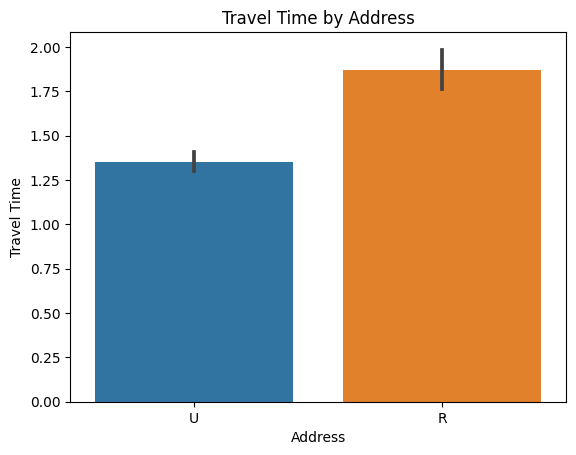

In [76]:
#3. Do students living in urban or rural areas have different travel times to school? 
sns.barplot(x=df['address'], y=df['traveltime'])
plt.xlabel('Address')
plt.ylabel('Travel Time')
plt.title('Travel Time by Address')
plt.show()

Rural students have longer travel times to school compared to urban students, which may affect their daily routine.

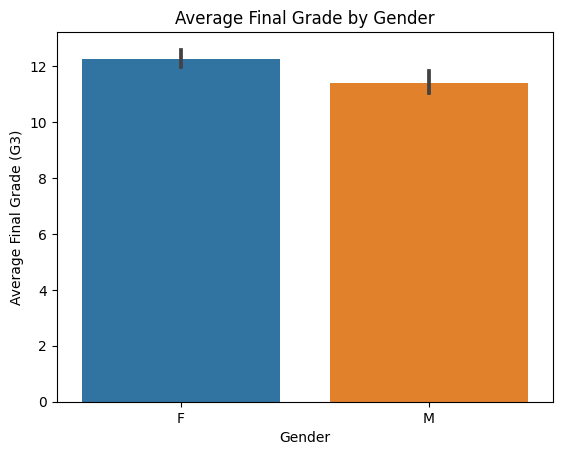

In [77]:
#4. Do boys and girls have different final grades (G3)?
sns.barplot(x=df['sex'], y=df['G3'])
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.title('Average Final Grade by Gender')
plt.show()

This graph shows that female students tend to study more and get better grades than male students.

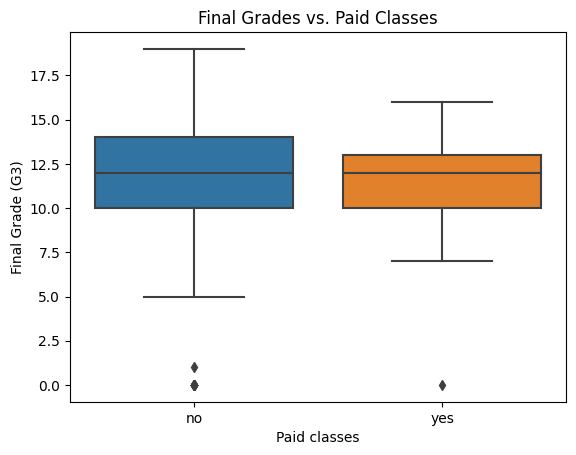

In [78]:
#5. Do students who attend extra paid classes perform better ?
sns.boxplot(x=df['paid'], y=df['G3'])
plt.xlabel("Paid classes")
plt.ylabel("Final Grade (G3)")
plt.title("Final Grades vs. Paid Classes")
plt.show()

We can see that middle line of the box is at same level so there is no difference made due to paid extra classes in grades.

In [89]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("/kaggle/input/campuspulse/Dataset.csv")

# droping empty rows
df = df.dropna(how='all')

# filling missing values
# for columns with text (object), fill with the most common value (mode)
# for number columns, fill with the middle value (median)
for column in df.columns:
    if df[column].dtype == 'O':  # 'O' stands for object (i.e., text)
        mode_value = df[column].mode()
        if not mode_value.empty:
            df[column] = df[column].fillna(mode_value[0])
        else:
            df[column] = df[column].fillna("unknown")
    else:
        df[column] = df[column].fillna(df[column].median())

# convert romantic to numbers yes : 1, no : 0
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})

# select all other columns as input features except romantic
features = [col for col in df.columns if col != 'romantic']

# converting categorical variables to numbers using one hot encoding
X = pd.get_dummies(df[features], drop_first=True)

y = df['romantic']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

# creating logistic regression model and train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)

# evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# important features
importance = pd.Series(model.coef, index=X.columns)  # This line will give a shape error
print("Feature importances (higher = more important):")
print(importance.sort_values(ascending=False))


Accuracy: 0.5769230769230769
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        81
           1       0.41      0.29      0.34        49

    accuracy                           0.58       130
   macro avg       0.52      0.52      0.51       130
weighted avg       0.55      0.58      0.56       130



AttributeError: 'LogisticRegression' object has no attribute 'coef'

This code cleans the dataset, encodes categorical variables, and uses logistic regression to predict if a student is in a romantic relationship also evaluating model accuracy

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0       no
1       no
2       no
3      yes
4       no
      ... 
644     no
645     no
646     no
647     no
648     no
Name: romantic, Length: 649, dtype: object

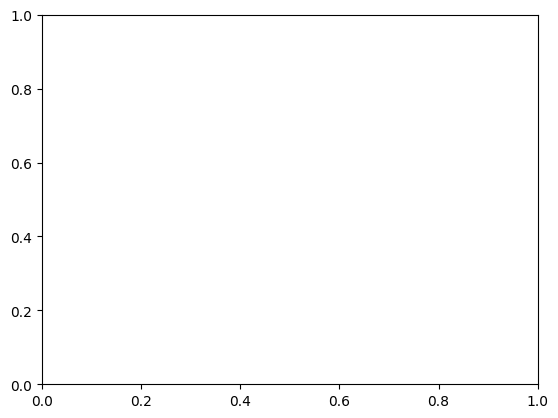

In [85]:
import shap
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("/kaggle/input/campuspulse/Dataset.csv")
X = df[['goout', 'G1']]
y = df['romantic']

model = LogisticRegression()
model.fit(X, y)

# Ploting deceisiion boundary
import matplotlib.pyplot as plt
plt.scatter(df['goout'], df['G1'], c=y)
plt.show()

# SHAP
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

# one prediction
shap.plots.waterfall(shap_values[0])


**I couldnt complete the task on time ;)**